In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [3]:
# Clean data
df =  df[(df['value'] > df['value'].quantile(0.025)) &
(df['value'] < df['value'].quantile(0.975))]

In [10]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(df, c='r')
    ax.set(xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return ax

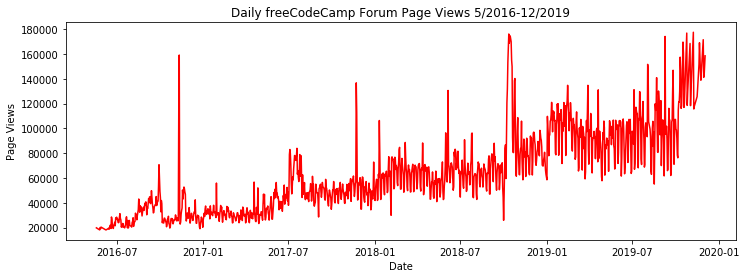

In [11]:
draw_line_plot()

In [13]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['years'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    d1 = df_bar.groupby(['years','month'])['value'].mean().to_frame()
    d1.sort_values('month',inplace=True)
    d1_pivot = d1.pivot_table(index='years', columns='month')
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(12,6))
    d1_pivot.plot(kind='bar', ax=ax)
    ax.legend(months, title='Months')
    ax.set(xlabel='Years', ylabel='Average Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return ax

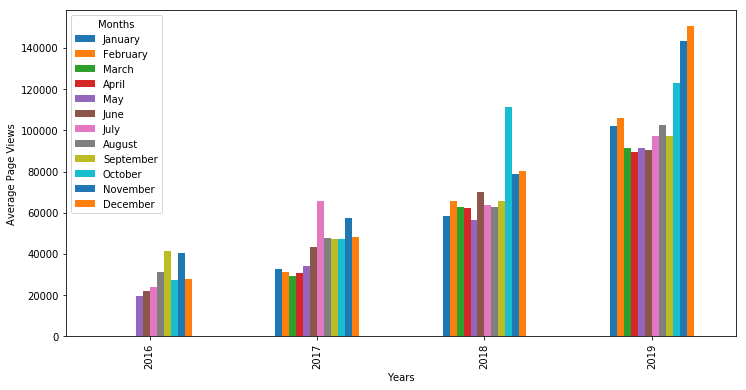

In [14]:
draw_bar_plot()

In [17]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['Years'] = [d.year for d in df_box.date]
    df_box['Months'] = [d.strftime('%b') for d in df_box.date]
    df_box['mt_num'] = [d.month for d in df_box['date']]
    df_box.sort_values(by='mt_num',inplace=True)

    # Draw box plots (using Seaborn)
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))
    sns.boxplot(x=df_box['Years'], y=df_box['value'], ax=ax1)
    sns.boxplot(x=df_box['Months'], y=df_box['value'], ax=ax2)
    ax1.set(title = 'Year-wise Box Plot (Trend)', ylabel = 'Page Views', xlabel='Year')
    ax2.set(title = 'Month-wise Box Plot (Seasonality)', ylabel='Page Views',xlabel='Month')
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return (ax1,ax2)

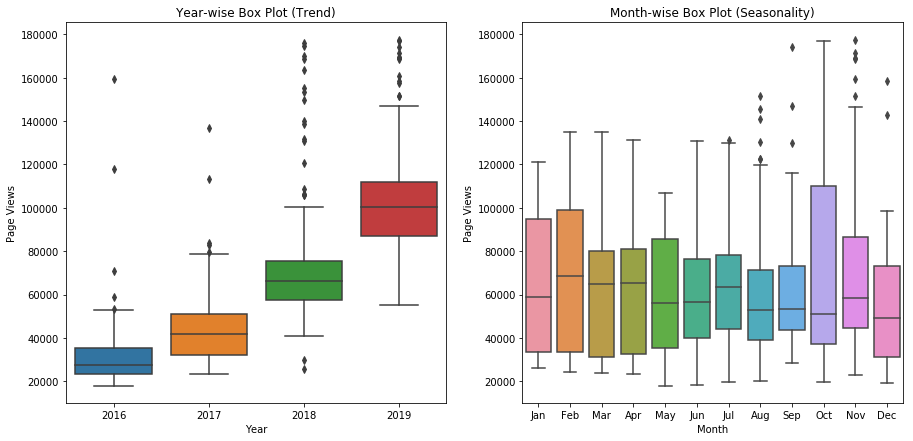

(<matplotlib.axes._subplots.AxesSubplot at 0x25effa9c588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25effac1358>)

In [18]:
draw_box_plot()